# Importing Necessary Libraries

In [102]:
#1.Pandas for dataframe
import pandas as pd

    #2. NumPy to peform Calculations
import numpy as np

    #3. Seaborn to Visualize data
import seaborn as sns

    #4. To split data
from sklearn.model_selection import train_test_split

    #5. For Linear Regression
from sklearn.linear_model import LinearRegression

    #6. For Plotting Graph
import matplotlib.pyplot as plt

    #7. For Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

    #8. For Calculating Mean Squared Error
from sklearn.metrics import mean_squared_error

# Setting dimensions for plot
sns.set(rc={'figure.figsize':(5.7,3.7)})

# Pre-processing data

In [103]:
# Reading CSV file
cars_data=pd.read_csv("cars_sampled.csv" )
#Creating copy
cars=cars_data.copy()

# Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [104]:
# Summarizing data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.00,50001.00,50001.00,50001.00,50001.00,50001.00
mean,6559.87,2005.54,116.50,125613.69,5.74,50775.22
std,85818.47,122.99,230.57,40205.23,3.71,25743.70
min,0.00,1000.00,0.00,5000.00,0.00,1067.00
25%,1150.00,1999.00,69.00,125000.00,3.00,30559.00
50%,2950.00,2003.00,105.00,150000.00,6.00,49504.00
75%,7190.00,2008.00,150.00,150000.00,9.00,71404.00
max,12345678.00,9999.00,19312.00,150000.00,12.00,99998.00


In [105]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.00,50001.00,50001.00,50001.00,50001.00,50001.00
mean,6559.87,2005.54,116.50,125613.69,5.74,50775.22
std,85818.47,122.99,230.57,40205.23,3.71,25743.70
min,0.00,1000.00,0.00,5000.00,0.00,1067.00
25%,1150.00,1999.00,69.00,125000.00,3.00,30559.00
50%,2950.00,2003.00,105.00,150000.00,6.00,49504.00
75%,7190.00,2008.00,150.00,150000.00,9.00,71404.00
max,12345678.00,9999.00,19312.00,150000.00,12.00,99998.00


In [106]:
  # Data cleaning
# Dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

# Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records

# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<Axes: xlabel='yearOfRegistration', ylabel='price'>

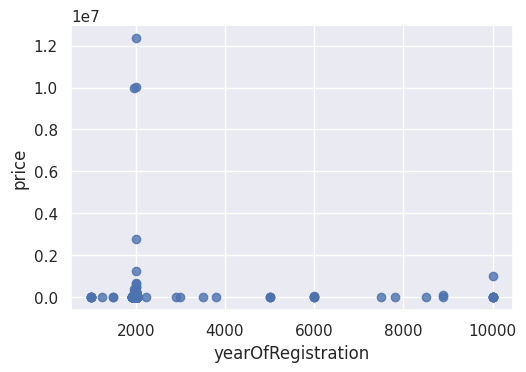

In [107]:
# Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()

sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True,
            fit_reg=False, data=cars)
# Working range- 1950 and 2018

In [108]:
cars['price'].describe()

count      49531.00
mean        6567.22
std        86222.38
min            0.00
25%         1150.00
50%         2950.00
75%         7100.00
max     12345678.00
Name: price, dtype: float64

1748

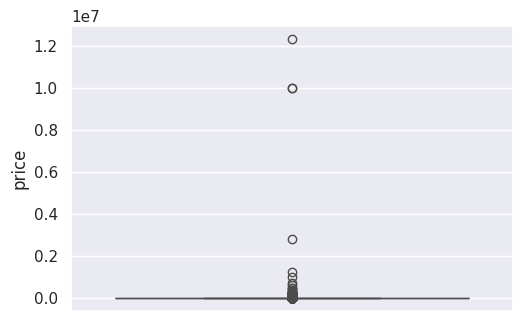

In [109]:
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000

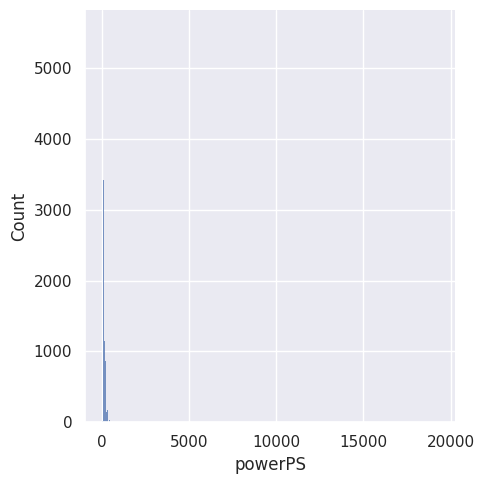

In [110]:
# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
sns.displot(cars['powerPS'])

In [15]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<Axes: ylabel='powerPS'>

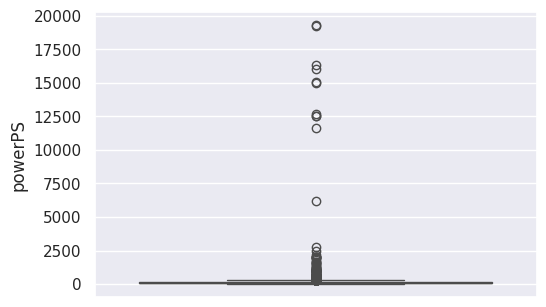

In [111]:
sns.boxplot(y=cars['powerPS'])

5565

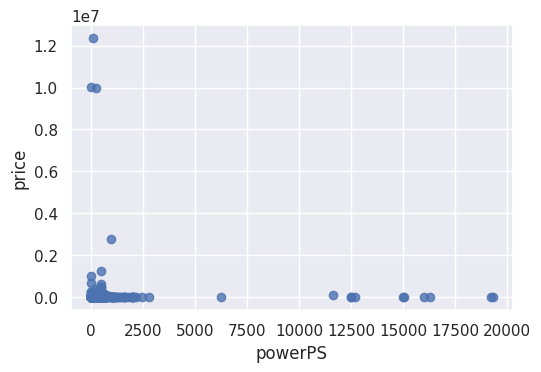

In [112]:
sns.regplot(x='powerPS', y='price', scatter=True,
            fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

In [18]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018)
      & (cars.yearOfRegistration >= 1950)
      & (cars.price >= 100)
      & (cars.price <= 150000)
      & (cars.powerPS >= 10)
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [114]:
# Further to simplify- variable reduction
# Combine yearOfRegistration and monthOfRegistration into a single variable using .loc
cars.loc[:, 'Age'] = (2018 - cars.loc[:, 'yearOfRegistration']) + (cars.loc[:, 'monthOfRegistration'] / 12)

# Round Age to two decimal places
cars.loc[:, 'Age'] = round(cars.loc[:, 'Age'], 2)

# Describe the Age variable
cars['Age'].describe()

count   49531.00
mean       12.92
std       123.58
min     -7981.00
25%        10.42
50%        15.08
75%        19.42
max      1018.50
Name: Age, dtype: float64

In [23]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

KeyError: "['yearOfRegistration', 'monthOfRegistration'] not found in axis"

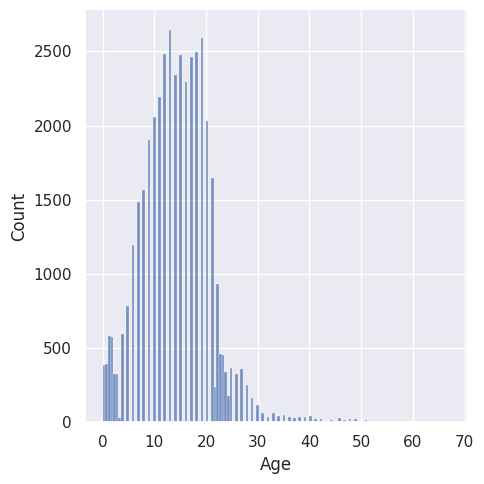

In [24]:
# Visualizing parameters
# Age
sns.displot(cars['Age'])

<Axes: ylabel='Age'>

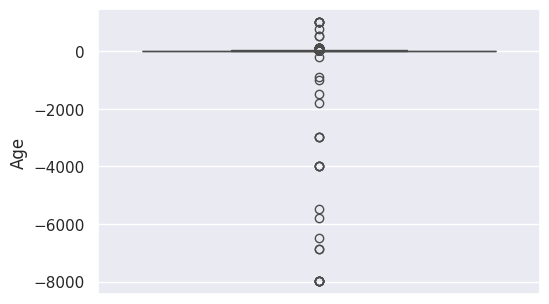

In [115]:
sns.boxplot(y=cars['Age'])

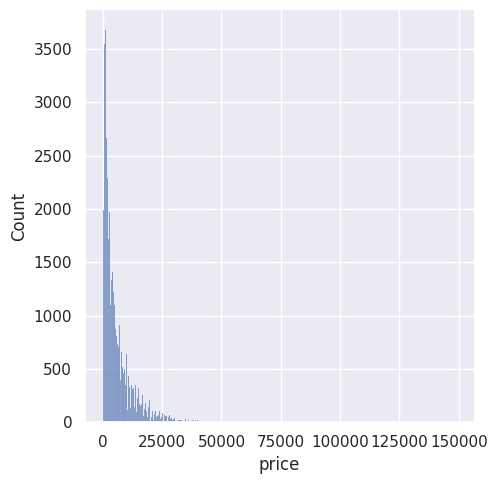

In [26]:
# price
sns.displot(cars['price'])

<Axes: ylabel='price'>

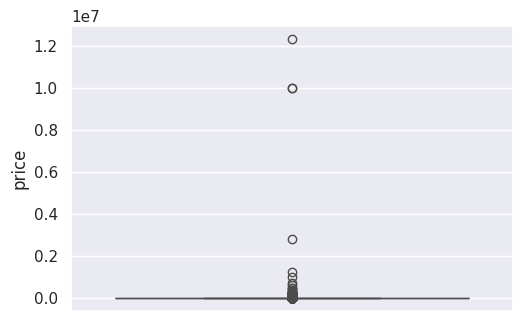

In [116]:
sns.boxplot(y=cars['price'])

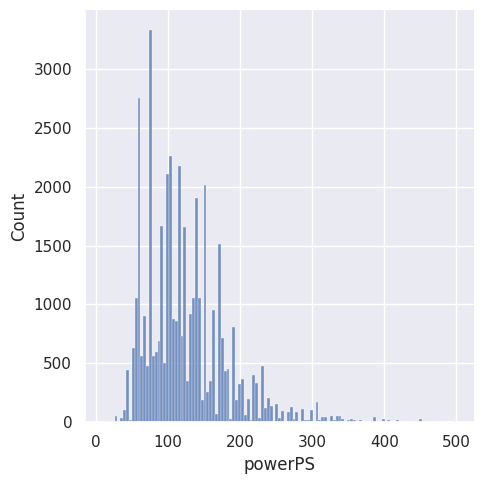

In [28]:
# powerPS
sns.displot(cars['powerPS'])

<Axes: ylabel='price'>

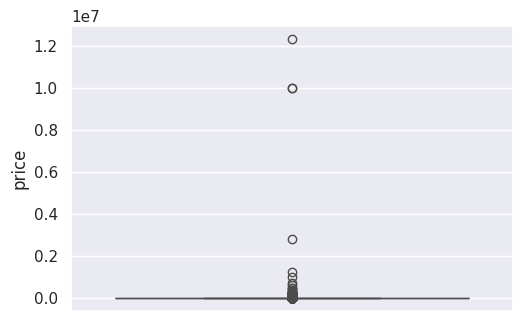

In [117]:
sns.boxplot(y=cars['price'])

<Axes: xlabel='Age', ylabel='price'>

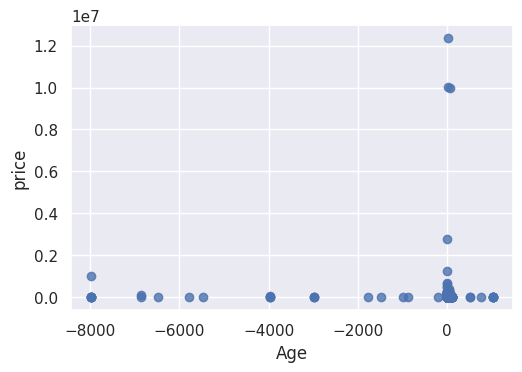

In [118]:
# Visualizing parameters after narrowing working range

# Age vs price
sns.regplot(x='Age', y='price', scatter=True,
            fit_reg=False, data=cars)
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age

<Axes: xlabel='powerPS', ylabel='price'>

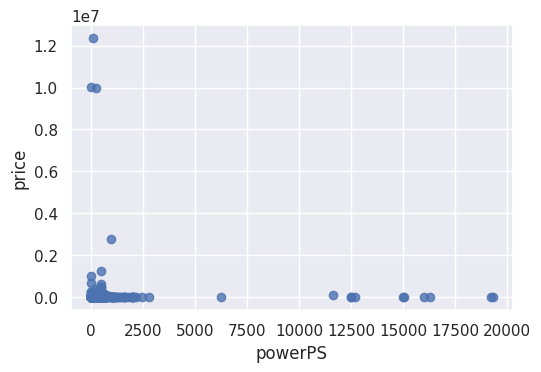

In [119]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True,
            fit_reg=False, data=cars)

In [32]:
# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<Axes: xlabel='seller', ylabel='count'>

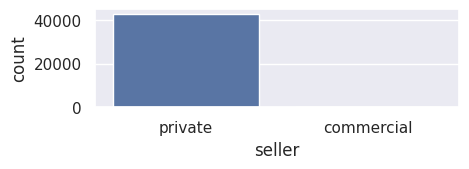

In [33]:
sns.countplot(x= 'seller',data=cars)
# Fewer cars have 'commercial'=> Insignificant

In [34]:
# Variable offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

<Axes: xlabel='offerType', ylabel='count'>

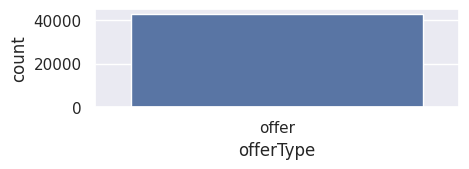

In [35]:
sns.countplot(x= 'offerType',data=cars)
# All cars have 'offer'=> Insignificant

In [36]:
# Variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [37]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='count'>

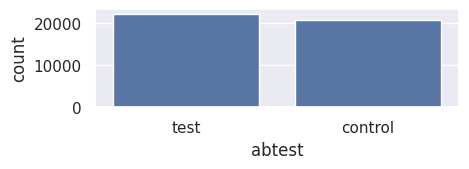

In [38]:
sns.countplot(x= 'abtest',data=cars)

<Axes: xlabel='abtest', ylabel='price'>

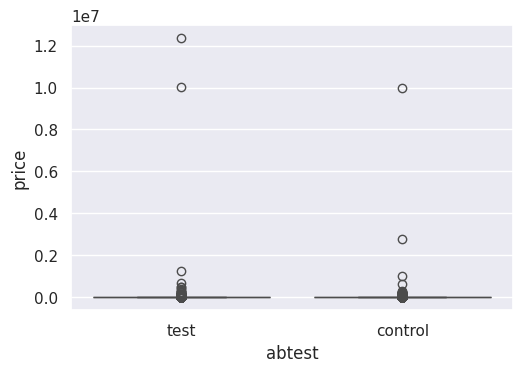

In [120]:
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

In [40]:
# Variable vehicleType
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [41]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


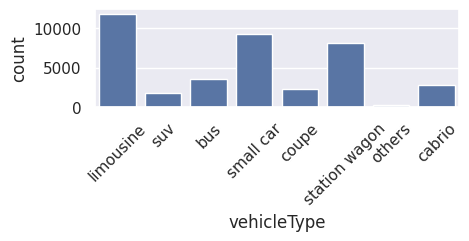

In [42]:
g=sns.countplot(x= 'vehicleType',data=cars)
g.tick_params(axis='x', rotation=45)

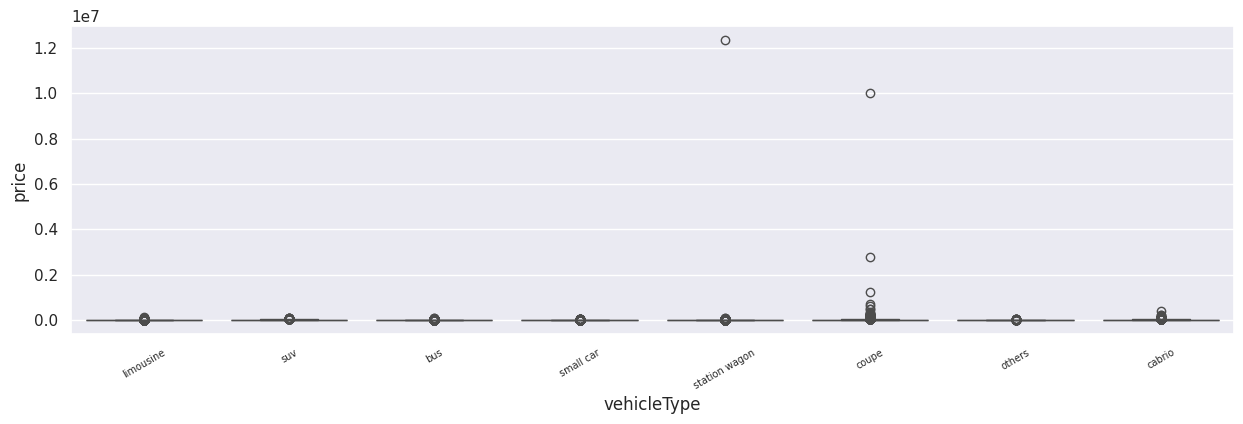

In [124]:
g=sns.boxplot(x= 'vehicleType',y='price',data=cars)
g.tick_params(axis='x', rotation=30)
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price

In [44]:
# Variable gearbox
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [45]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

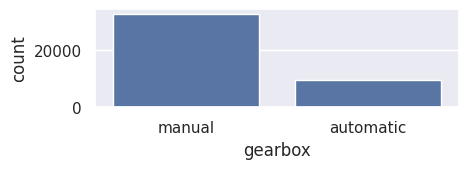

In [46]:
sns.countplot(x= 'gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

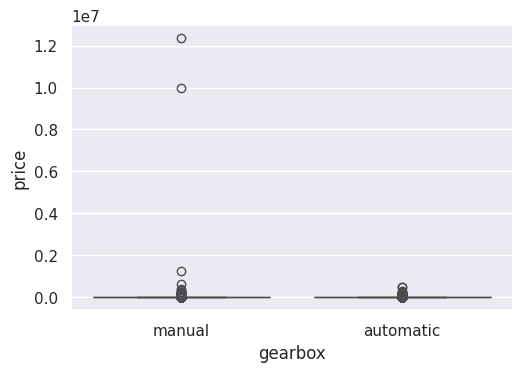

In [121]:
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price

In [49]:
# Variable model
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [50]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


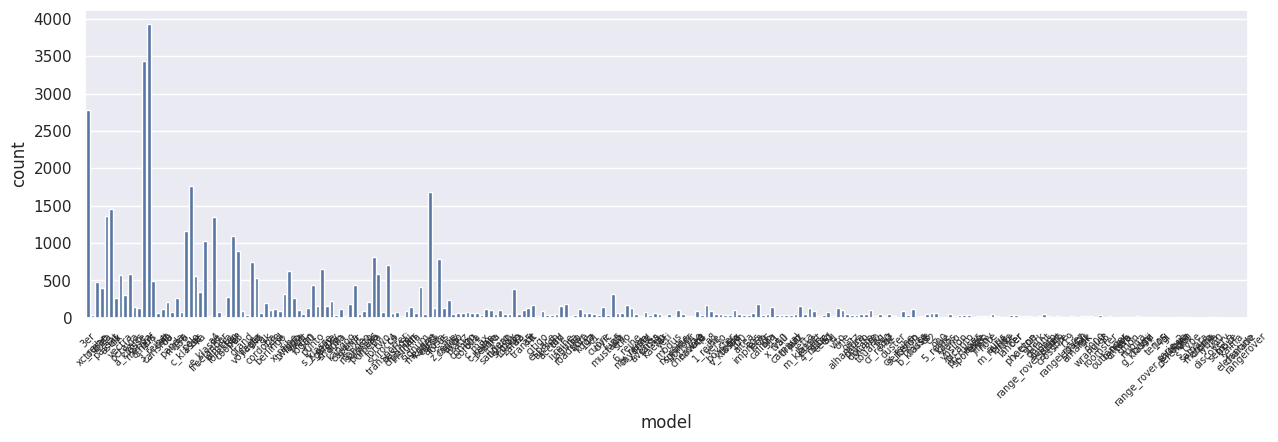

In [127]:
plt.rcParams["figure.figsize"] = (15, 4)
plt.rcParams["xtick.labelsize"] = 7

g=sns.countplot(x= 'model',data=cars)
g.tick_params(axis='x', rotation=45)

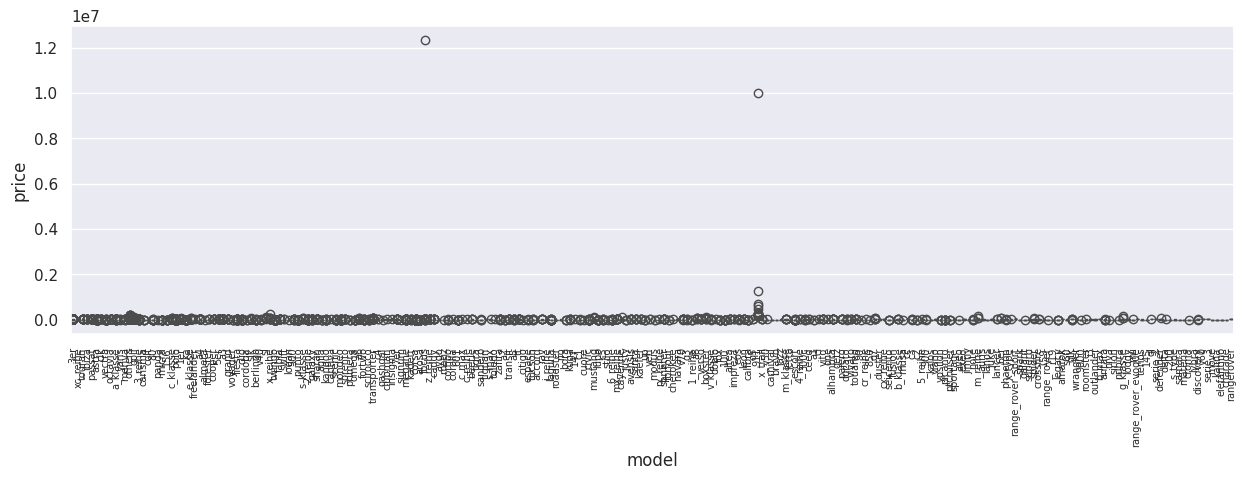

In [128]:
g=sns.boxplot(x= 'model',y='price',data=cars)
g.tick_params(axis='x', rotation=90)
# Cars are distributed over many models
# Considered in modelling

In [53]:
# Variable kilometer
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [54]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


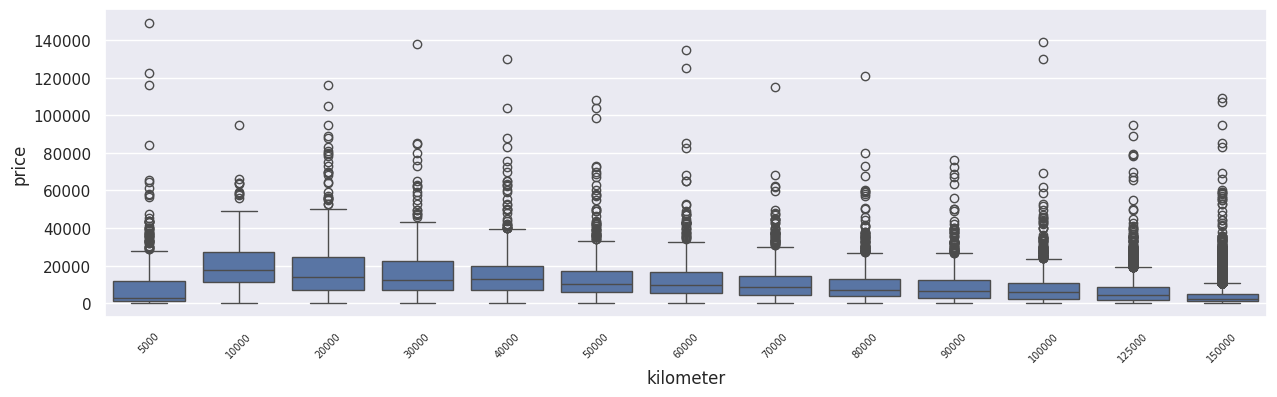

In [55]:
g=sns.boxplot(x= 'kilometer',y='price',data=cars)
g.tick_params(axis='x', rotation=45)

In [56]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

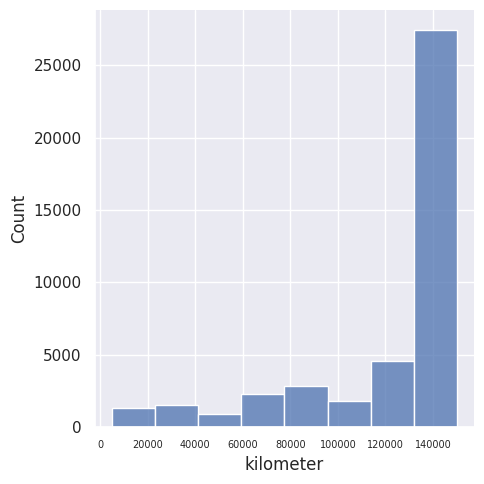

In [57]:
g=sns.displot(cars['kilometer'],bins=8 ,kde=False)

<Axes: xlabel='kilometer', ylabel='price'>

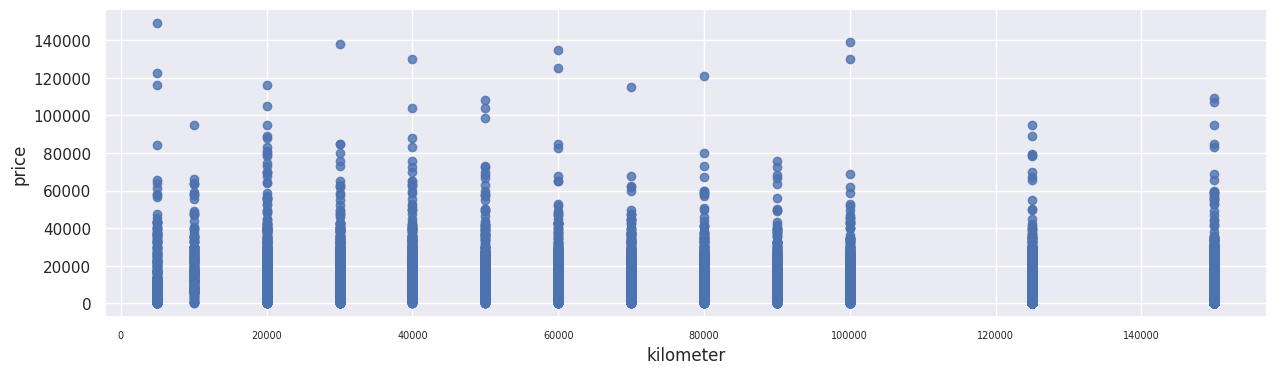

In [58]:
sns.regplot(x='kilometer', y='price', scatter=True,
            fit_reg=False, data=cars)
# Considered in modelling

In [59]:
# Variable fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [60]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<Axes: xlabel='fuelType', ylabel='count'>

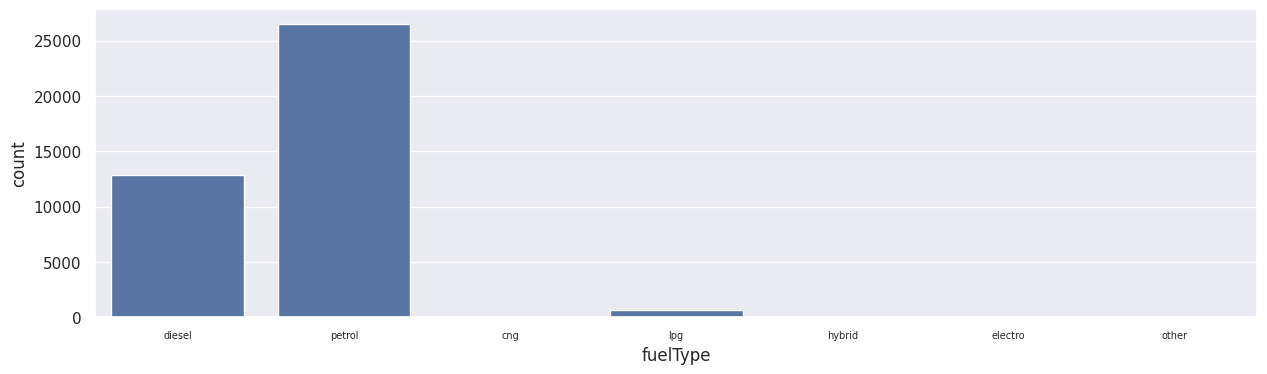

In [61]:
sns.countplot(x= 'fuelType',data=cars)

<Axes: xlabel='fuelType', ylabel='price'>

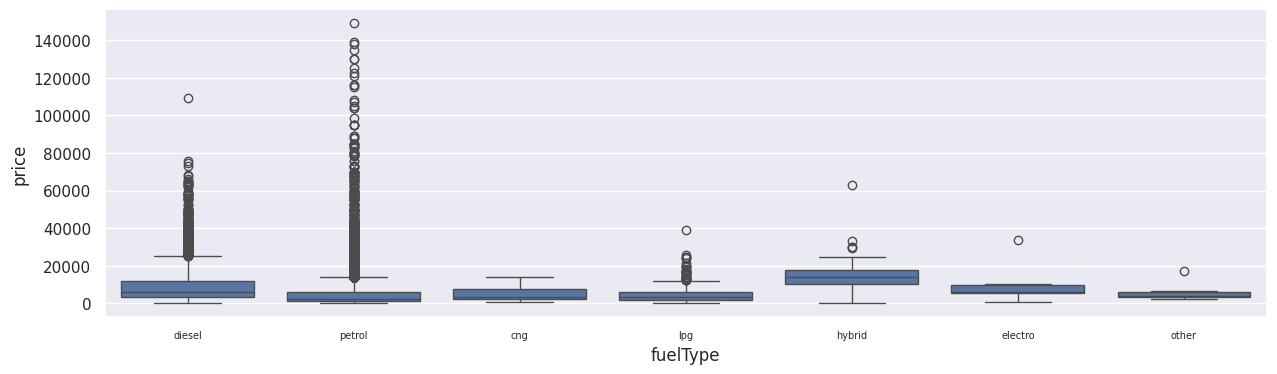

In [62]:
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price

In [63]:
# Variable brand
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [64]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


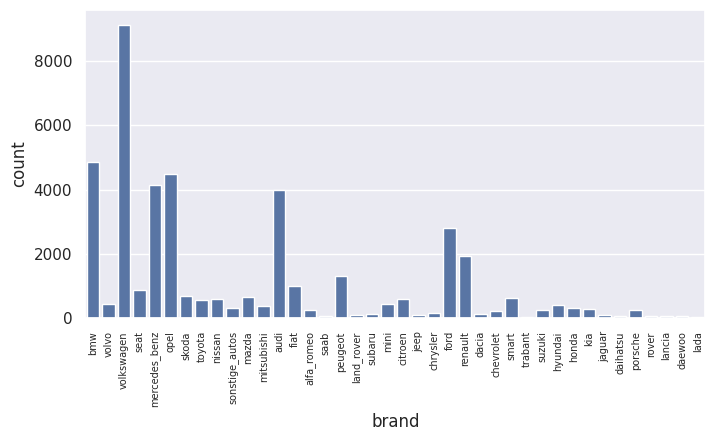

In [65]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
g=sns.countplot(x= 'brand',data=cars)
g.tick_params(axis='x', rotation=90)

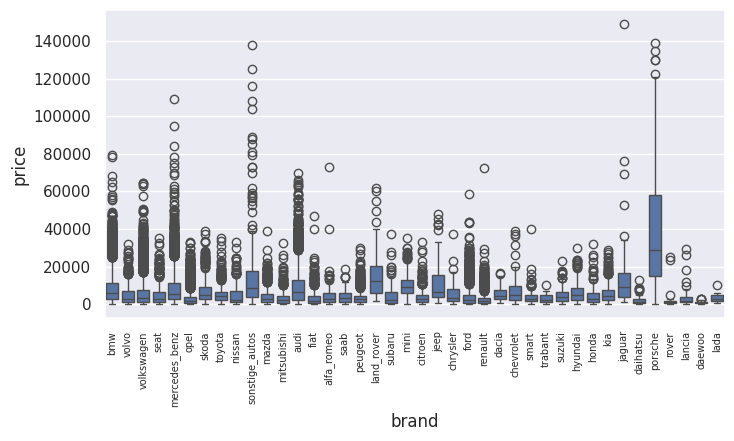

In [66]:
g=sns.boxplot(x= 'brand',y='price',data=cars)
g.tick_params(axis='x', rotation=90)
# Cars are distributed over many brands
# Considered for modelling

In [67]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [68]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<Axes: xlabel='notRepairedDamage', ylabel='count'>

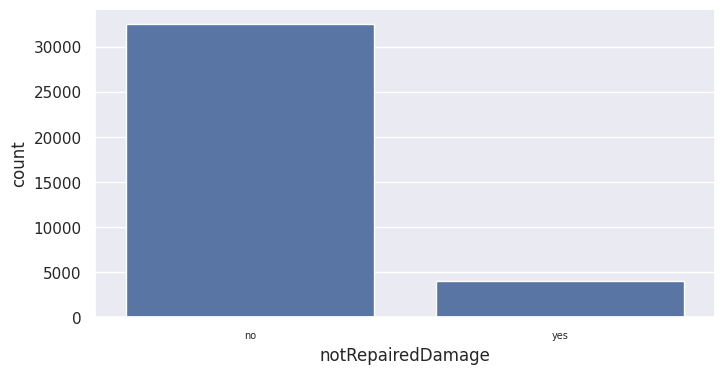

In [69]:
sns.countplot(x= 'notRepairedDamage',data=cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

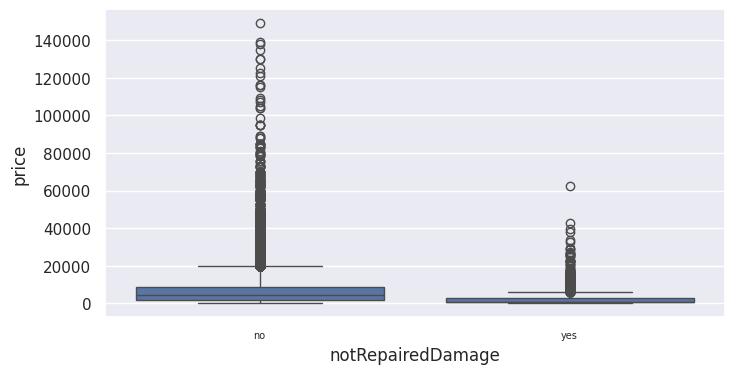

In [70]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

In [71]:
# Removing insignificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [72]:
# Correlation
# =============================================================================

cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.338
Name: price, dtype: float64

In [194]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

KeyError: "['yearOfRegistration', 'monthOfRegistration'] not found in axis"

#Building Model

In [195]:
"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values
"""

# OMITTING MISSING VALUES
cars_omit=cars.dropna(axis=0)

# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [242]:
# MODEL BUILDING WITH OMITTED DATA

# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
x1 = cars_omit[['powerPS', 'kilometer', 'Age']]
y1 = cars_omit['price']

In [243]:
x1.head()

,powerPS,kilometer,Age
1,163,150000,13.50
3,86,60000,13.00
4,185,150000,10.92
5,90,150000,23.17
7,136,150000,21.92


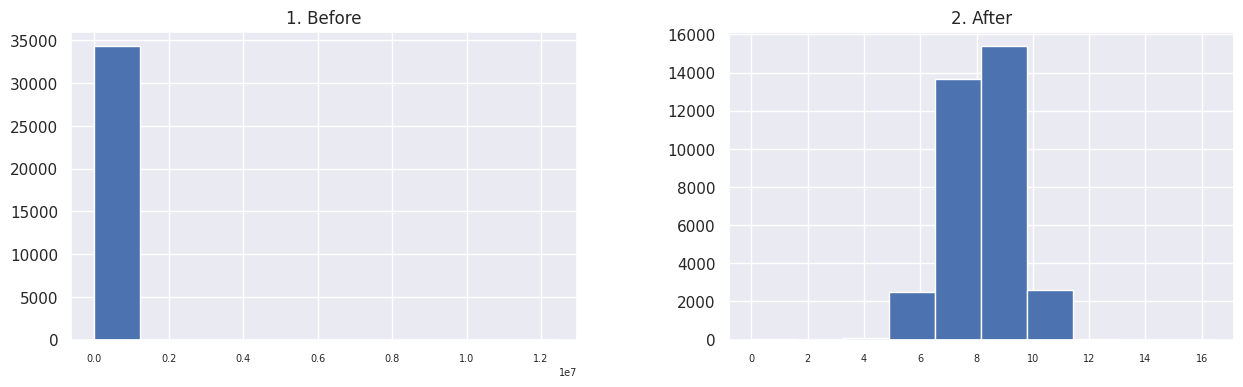

In [244]:
# Plotting the variable price
y1 = y1[y1 > 0]
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

# Transforming price as a logarithmic value
y1 = np.log(y1)

In [245]:
# Splitting data into test and train
x1 = x1[:y1.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24021, 3) (10295, 3) (24021,) (10295,)


In [246]:
# BASELINE MODEL FOR OMITTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.20941188046601


In [247]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1844212011643644


In [248]:
# LINEAR REGRESSION WITH OMITTED DATA

# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

# Model
model_lin1=lgr.fit(X_train,y_train)

In [202]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [203]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

1.1946604357496835


In [204]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

-0.017364588360884836 0.013962902211843375


<Axes: ylabel='price'>

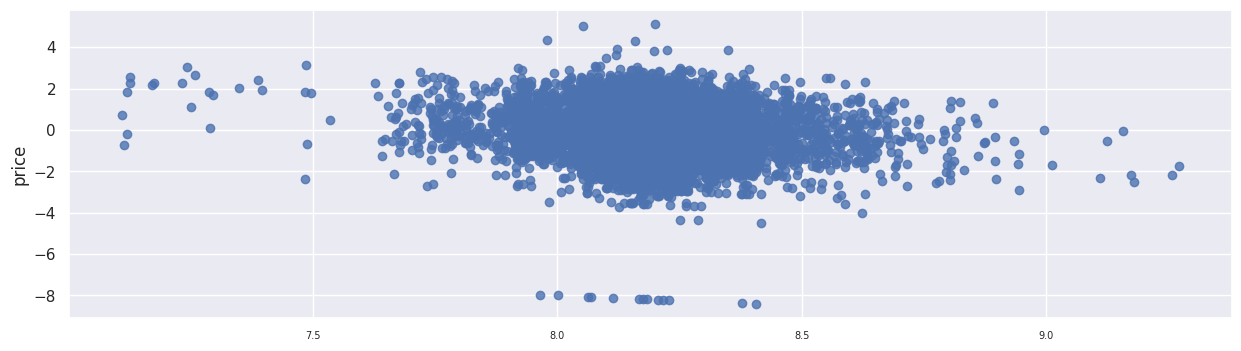

In [205]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True,
            fit_reg=False)

In [206]:
residuals1.describe()

count   10295.00
mean        0.01
std         1.19
min        -8.41
25%        -0.80
50%         0.06
75%         0.87
max         5.14
Name: price, dtype: float64

In [207]:
# RANDOM FOREST WITH OMITTED DATA
# =============================================================================

# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [208]:
# Model
max_features=1.0
model_rf1=rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [209]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [210]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

1.2203214629209043


In [211]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

-0.06153948795497288 0.40890886993987674


In [212]:
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

seller               0
offerType            0
price                0
abtest               0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [213]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [214]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

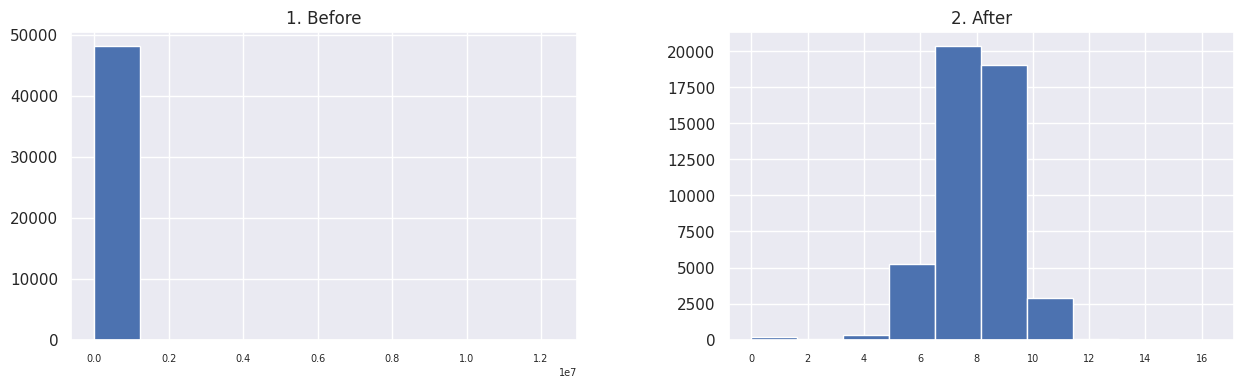

In [215]:
# Plotting the variable price
y2 = y2[y2 > 0]
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [216]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [217]:
# Splitting data into test and train
x2 = x2[:y2.shape[0]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(33681, 307) (14435, 307) (33681,) (14435,)


In [219]:
# BASELINE MODEL FOR IMPUTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

7.9789077216951485


In [220]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [221]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.3229810006997142


In [222]:
# LINEAR REGRESSION WITH IMPUTED DATA

# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [223]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [224]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [225]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

1.3291725869840487


In [226]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

-0.009381955863808189 0.009771629684640626


In [227]:
# RANDOM FOREST WITH IMPUTED DATA
# =============================================================================

# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [228]:
# Model
max_features=1.0
model_rf2=rf2.fit(X_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [229]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [230]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

1.3531676558464396


In [231]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

-0.04615492110735819 0.40009184583561064


In [232]:
# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.013962902211843375
R squared value for test from Linear Regression=  -0.017364588360884836
R squared value for train from Random Forest=  0.40890886993987674
R squared value for test from Random Forest=  -0.06153948795497288
Base RMSE of model built from data where missing values were omitted= 1.1844212011643644
RMSE value for test from Linear Regression=  1.1946604357496835
RMSE value for test from Random Forest=  1.2203214629209043



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.009771629684640626
R squared value for test from Linear Regression=  -0.009381955863808189
R squared value for train from Random Forest=  0.40009184583561064
R squared value for test from Random Forest=  -0.04615492110735819
Base RMSE of model built from data where missing values were imputed= 1.3229810006997142
R

So, we observe the RMSE is the lowest when the missing values are omitted in Linear Regression Model. It gives better performance than the others.

# Price Prediction

In [254]:
# MODEL BUILDING WITH OMITTED DATA

# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
x1 = cars_omit[['powerPS', 'kilometer', 'Age']]
x1.columns = ['powerPS', 'kilometer', 'Age']  # Set column names
y1 = cars_omit['price']

In [255]:
# Train a model
model = LinearRegression()
model.fit(x1, y1)

LinearRegression()

In [252]:
cars.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.25
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.50
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.92
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.00
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.92


In [258]:
  #Taking User Input

powerPS=int(input("Enter Power of Vehicle:"))
kilometer=int(input("Enter Distance travelled in Kilometres by the Vehicle:"))
Age=float(input("Enter Year of Vehicle in Years:"))

data = np.array([powerPS, kilometer, Age])
data=data.reshape(1, -1)

# Make predictions
predictions = model.predict(data)
print("Price:", np.round(predictions,2))

Enter Power of Vehicle:120
Enter Distance travelled in Kilometres by the Vehicle:130000
Enter Year of Vehicle in Years:5
Price: [6787.06]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
